In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/loans_2007.csv')

<ipython-input-1-9990c068cc78>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/loans_2007.csv')


In [ ]:
df.head(10)

In [3]:
df = df.drop(['id','member_id','funded_amnt','funded_amnt_inv','grade',
'sub_grade',
'emp_title',
'issue_d',
'zip_code',
'out_prncp',
'out_prncp_inv',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'total_rec_late_fee',
'recoveries',
'collection_recovery_fee',
'last_pymnt_d',
'last_pymnt_amnt',
'pub_rec_bankruptcies',
'earliest_cr_line',
'last_credit_pull_d',], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42549 non-null  float64
 1   term                        42549 non-null  object 
 2   int_rate                    42549 non-null  object 
 3   installment                 42549 non-null  float64
 4   emp_length                  41436 non-null  object 
 5   home_ownership              42549 non-null  object 
 6   annual_inc                  42545 non-null  float64
 7   verification_status         42549 non-null  object 
 8   loan_status                 42549 non-null  object 
 9   pymnt_plan                  42549 non-null  object 
 10  purpose                     42549 non-null  object 
 11  title                       42536 non-null  object 
 12  addr_state                  42549 non-null  object 
 13  dti                         425

In [5]:
print(df.isnull().sum())

loan_amnt                        3
term                             3
int_rate                         3
installment                      3
emp_length                    1116
home_ownership                   3
annual_inc                       7
verification_status              3
loan_status                      3
pymnt_plan                       3
purpose                          3
title                           16
addr_state                       3
dti                              3
delinq_2yrs                     33
inq_last_6mths                  33
open_acc                        33
pub_rec                         33
revol_bal                        3
revol_util                      94
total_acc                       33
initial_list_status              3
collections_12_mths_ex_med     149
policy_code                      3
application_type                 3
acc_now_delinq                  33
chargeoff_within_12_mths       149
delinq_amnt                     33
tax_liens           

In [6]:
# Chuẩn hóa tất cả các ô có chứa str thành 1 dạng
df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)
# Xóa bỏ các khoảng trắng vô nghĩa trong các chuỗi
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# **Chuẩn hóa các biến Nominal và Ordinal**

In [7]:
mapping_table = {
    'FULLY PAID': 1,
    'CURRENT': 2,
    'IN GRACE PERIOD': 3,
    'LATE (16-30 DAYS)': 4,
    'LATE (31-120 DAYS)': 5,
    'DEFAULT': 6,
    'CHARGED OFF': 7,
    'DOES NOT MEET THE CREDIT POLICY. STATUS:FULLY PAID': 8,
    'DOES NOT MEET THE CREDIT POLICY. STATUS:CHARGED OFF': 9
}

# Chuyển đổi giá trị mức độ tín dụng thành giá trị số
df['loan_status'] = df['loan_status'].map(mapping_table)
df = df.dropna(subset=['loan_status'])

In [8]:
unique_elements = df['loan_status'].unique().tolist()
unique_elements
df = df.drop(df[~df['loan_status'].isin([1.0, 7.0])].index)
df['loan_status'] = df['loan_status'].replace(7.0, 0.0)

In [9]:
mapping_table = {
    '10+ YEARS': 10,
    '< 1 YEAR': 0,
    '1 YEAR': 1,
    '2 YEARS': 2,
    '3 YEARS': 3,
    '4 YEARS': 4,
    '5 YEARS': 5,
    '6 YEARS': 6,
    '7 YEARS': 7,
    '8 YEARS': 8,
    '9 YEARS': 9
}
# Chuyển đổi giá trị cột thành số, giữ nguyên NaN
df['emp_length'] = df['emp_length'].map(mapping_table).fillna(df['emp_length'])

In [10]:
unique_elements = df['emp_length'].unique().tolist()
unique_elements

[10.0, 0.0, 3.0, 8.0, 9.0, 4.0, 5.0, 1.0, 6.0, 2.0, 7.0, nan]

In [11]:
mapping_table = {
    '36 MONTHS': 0,
    '60 MONTHS': 1,
}

# Chuyển đổi giá trị mức độ tín dụng thành giá trị số
df['term'] = df['term'].map(mapping_table)
df = df.dropna(subset=['term'])
unique_elements = df['term'].unique().tolist()
unique_elements

[0, 1]

In [12]:
from sklearn.preprocessing import LabelEncoder
# Tạo một đối tượng LabelEncoder
label_encoder = LabelEncoder()

# Áp dụng Label Encoding cho cột 'purpose'
df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])

unique_elements = df['home_ownership'].unique().tolist()
unique_elements

[4, 3, 0, 2, 1]

In [13]:
# Áp dụng One-Hot Encoding cho cột 'column'
one_hot_encoded = pd.get_dummies(df['verification_status'], prefix='verification_status')

# Kết hợp các cột mới vào DataFrame gốc
df = pd.concat([df, one_hot_encoded], axis=1)
df=df.drop('verification_status', axis = 1)


In [14]:
unique_elements = df['purpose'].unique().tolist()
unique_elements

['CREDIT_CARD',
 'CAR',
 'SMALL_BUSINESS',
 'OTHER',
 'WEDDING',
 'DEBT_CONSOLIDATION',
 'HOME_IMPROVEMENT',
 'MAJOR_PURCHASE',
 'MEDICAL',
 'MOVING',
 'VACATION',
 'HOUSE',
 'RENEWABLE_ENERGY',
 'EDUCATIONAL']

In [15]:
from sklearn.preprocessing import LabelEncoder
# Tạo một đối tượng LabelEncoder
label_encoder = LabelEncoder()

# Áp dụng Label Encoding cho cột 'purpose'
df['purpose'] = label_encoder.fit_transform(df['purpose'])

In [16]:
unique_elements = df['title'].unique().tolist()
# Tiến hành loại bỏ feature title vì không có sự liên quan
df = df.drop("title", axis = 1 )

In [17]:
unique_elements = df['pymnt_plan'].unique().tolist()
unique_elements
df = df.drop("pymnt_plan", axis = 1 )

In [18]:
unique_elements = df['initial_list_status'].unique().tolist()
unique_elements
df = df.drop("initial_list_status", axis = 1 )

In [19]:
unique_elements = df['application_type'].unique().tolist()
unique_elements
df = df.drop("application_type", axis = 1 )

In [20]:
# Chuyển đổi cột 'percentage' thành dạng thập phân
df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float) / 100
unique_elements = df['revol_util'].unique().tolist()
unique_elements

[0.8370000000000001,
 0.094,
 0.985,
 0.21,
 0.28300000000000003,
 0.856,
 0.875,
 0.326,
 0.365,
 0.20600000000000002,
 0.6709999999999999,
 0.917,
 0.431,
 0.555,
 0.815,
 0.7020000000000001,
 0.16,
 0.37729999999999997,
 0.231,
 0.903,
 0.8240000000000001,
 0.9179999999999999,
 0.297,
 0.9390000000000001,
 0.5760000000000001,
 0.595,
 0.377,
 0.591,
 0.8690000000000001,
 0.27399999999999997,
 0.293,
 0.605,
 0.5720000000000001,
 0.133,
 0.504,
 0.665,
 0.18100000000000002,
 0.981,
 0.99,
 0.325,
 0.134,
 0.621,
 0.523,
 0.195,
 0.364,
 0.637,
 0.62,
 0.929,
 0.9079999999999999,
 0.521,
 0.976,
 0.7509999999999999,
 0.727,
 0.912,
 0.589,
 0.574,
 0.669,
 0.301,
 0.45899999999999996,
 0.708,
 0.8340000000000001,
 0.7390000000000001,
 0.795,
 0.794,
 0.675,
 0.8320000000000001,
 0.97,
 0.55,
 0.785,
 0.65,
 0.067,
 0.778,
 0.5329999999999999,
 0.813,
 0.748,
 0.139,
 0.823,
 0.787,
 0.7829999999999999,
 0.9640000000000001,
 0.276,
 0.784,
 0.7809999999999999,
 0.884,
 0.512,
 0.524,
 

In [21]:
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float) / 100
unique_elements = df['int_rate'].unique().tolist()
unique_elements

[0.1065,
 0.1527,
 0.15960000000000002,
 0.1349,
 0.079,
 0.1864,
 0.21280000000000002,
 0.12689999999999999,
 0.1465,
 0.09910000000000001,
 0.1629,
 0.0603,
 0.11710000000000001,
 0.1242,
 0.1427,
 0.1677,
 0.0751,
 0.08900000000000001,
 0.1825,
 0.0662,
 0.1991,
 0.1727,
 0.17579999999999998,
 0.2167,
 0.1942,
 0.2089,
 0.203,
 0.2391,
 0.19030000000000002,
 0.23129999999999998,
 0.2274,
 0.2235,
 0.2206,
 0.24109999999999998,
 0.06,
 0.2352,
 0.2211,
 0.07490000000000001,
 0.1199,
 0.0599,
 0.1099,
 0.0999,
 0.18789999999999998,
 0.1149,
 0.0849,
 0.15990000000000001,
 0.1649,
 0.0699,
 0.12990000000000002,
 0.1523,
 0.1479,
 0.0542,
 0.1059,
 0.17489999999999997,
 0.1562,
 0.1929,
 0.1399,
 0.1839,
 0.1689,
 0.17989999999999998,
 0.20989999999999998,
 0.2285,
 0.19690000000000002,
 0.20620000000000002,
 0.2025,
 0.21359999999999998,
 0.2322,
 0.21739999999999998,
 0.2248,
 0.2359,
 0.12619999999999998,
 0.1807,
 0.11630000000000001,
 0.0791,
 0.0742,
 0.1114,
 0.20199999999999999,

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Áp dụng Label Encoding cho cột 'purpose'
df['addr_state'] = label_encoder.fit_transform(df['addr_state'])
unique_elements = df['addr_state'].unique().tolist()
unique_elements



[3,
 10,
 14,
 4,
 27,
 42,
 44,
 24,
 6,
 43,
 9,
 33,
 37,
 23,
 30,
 36,
 17,
 34,
 39,
 38,
 18,
 19,
 46,
 47,
 1,
 16,
 32,
 0,
 5,
 20,
 48,
 45,
 22,
 7,
 40,
 29,
 2,
 31,
 11,
 35,
 26,
 49,
 8,
 25,
 41,
 12,
 28,
 13,
 15,
 21]

In [23]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38770 entries, 0 to 39797
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38770 non-null  float64
 1   term                                 38770 non-null  int64  
 2   int_rate                             38770 non-null  float64
 3   installment                          38770 non-null  float64
 4   emp_length                           37734 non-null  float64
 5   home_ownership                       38770 non-null  int64  
 6   annual_inc                           38770 non-null  float64
 7   loan_status                          38770 non-null  float64
 8   purpose                              38770 non-null  int64  
 9   addr_state                           38770 non-null  int64  
 10  dti                                  38770 non-null  float64
 11  delinq_2yrs                 

In [24]:
df = df.fillna(df.mode().iloc[0])

In [25]:
df.describe()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,...,total_acc,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,verification_status_NOT VERIFIED,verification_status_SOURCE VERIFIED,verification_status_VERIFIED
count,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,3.877000e+04,38770.000000,38770.000000,38770.000000,...,38770.000000,38770.0,38770.0,38770.0,38770.0,38770.0,38770.0,38770.000000,38770.000000,38770.000000
mean,11069.122388,0.249523,0.119477,322.629489,5.079314,2.150503,6.880025e+04,0.854681,3.871344,21.773433,...,22.059788,0.0,1.0,0.0,0.0,0.0,0.0,0.431571,0.251148,0.317281
std,7362.292600,0.432742,0.036979,208.592815,3.603362,1.932766,6.416132e+04,0.352426,3.417641,14.809187,...,11.420556,0.0,0.0,0.0,0.0,0.0,0.0,0.495302,0.433679,0.465424
min,500.000000,0.000000,0.054200,15.690000,0.000000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,...,2.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,5325.000000,0.000000,0.089400,165.740000,2.000000,0.000000,4.000000e+04,1.000000,2.000000,6.000000,...,13.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,9737.500000,0.000000,0.117800,278.150000,4.000000,3.000000,5.892350e+04,1.000000,2.000000,20.000000,...,20.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,15000.000000,0.000000,0.144200,426.100000,9.000000,4.000000,8.200000e+04,1.000000,6.000000,34.000000,...,29.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000
max,35000.000000,1.000000,0.245900,1305.190000,10.000000,4.000000,6.000000e+06,1.000000,13.000000,49.000000,...,90.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [26]:
df = df.drop(['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis=1)

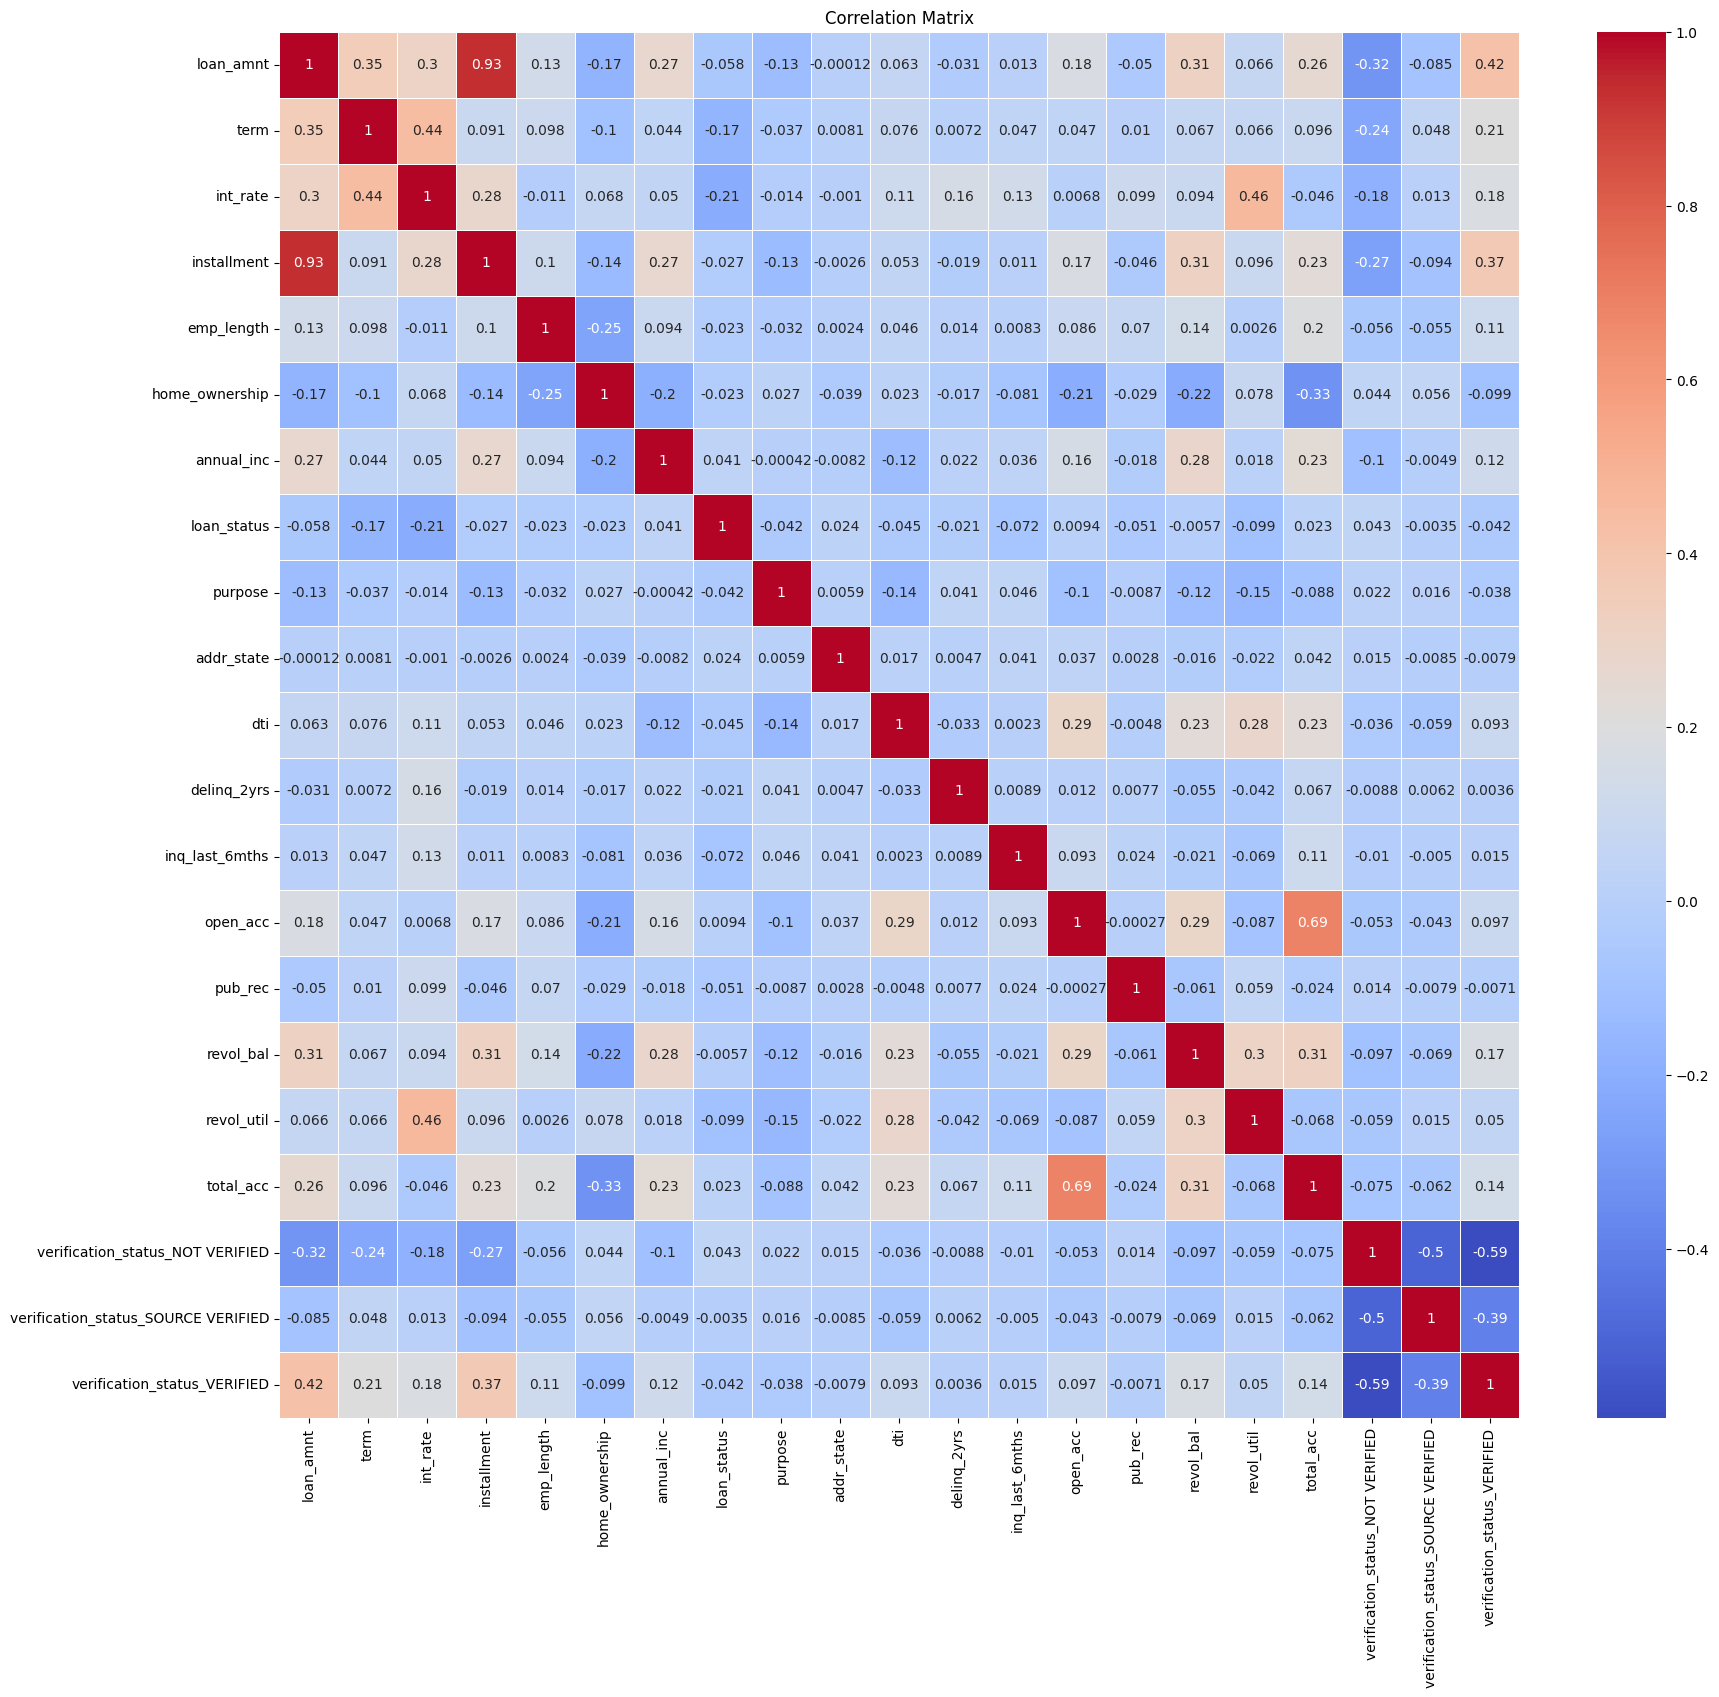

In [27]:

import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr()

# Vẽ ma trận tương quan dưới dạng heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Biểu đồ histogram
def _plot_hist_subplot(x, fieldname, bins = 10, use_kde = True):
  x = x.dropna()
  xlabel = '{} bins tickers'.format(fieldname)
  ylabel = 'Count obs in {} each bin'.format(fieldname)
  title = 'histogram plot of {} with {} bins'.format(fieldname, bins)
  ax = sns.distplot(x, bins = bins, kde = use_kde)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)
  ax.set_title(title)
  return ax

# Biểu đồ barchart
def _plot_barchart_subplot(x, fieldname):
  xlabel = 'Group of {}'.format(fieldname)
  ylabel = 'Count obs in {} each bin'.format(fieldname)
  title = 'Barchart plot of {}'.format(fieldname)
  x = x.fillna('Missing')
  df_summary = x.value_counts(dropna = False)
  y_values = df_summary.values
  x_index = df_summary.index
  ax = sns.barplot(x = x_index, y = y_values, order = x_index)
  # Tạo vòng for lấy tọa độ đỉnh trên cùng của biểu đồ và thêm label thông qua annotate.
  labels = list(set(x))
  for label, p in zip(y_values, ax.patches):
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.15))
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  return ax

# Khởi tạo figure cho đồ thị (Kích thước W*H = 16x12) và cách nhau là 0.2 giữa các đồ thị
fig = plt.figure(figsize=(20, 16))
fig.subplots_adjust(hspace=1.2, wspace=1.2)
# Tạo vòng for check định dạng của biến và visualize
for i, (fieldname, dtype) in enumerate(zip(df.columns, df.dtypes.values)):
  if i <= 26:
    ax_i = fig.add_subplot(6, 5, i+1)
    if dtype in ['float64', 'int64']:
      ax_i = _plot_hist_subplot(df[fieldname], fieldname=fieldname)
    else:
      ax_i = _plot_barchart_subplot(df[fieldname], fieldname=fieldname)

fig.suptitle('Visualization all fields')
plt.show()

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình hồi quy logistic
model = LogisticRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá hiệu suất mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác:", accuracy)
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Độ chính xác: 0.8482073768377612
F1-score: 0.9178588875706608


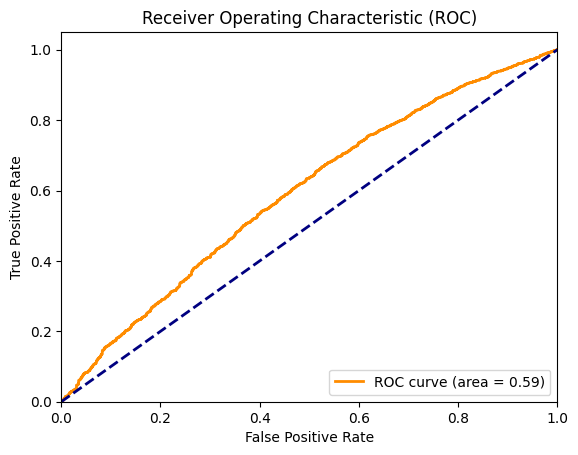

In [35]:
from sklearn.metrics import roc_curve, auc
# Dự đoán xác suất của lớp positive trên tập kiểm tra
y_scores = model.predict_proba(X_test)[:, 1]

# Tính toán đường cong ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Vẽ đường cong ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [39]:
from scipy.stats import ks_2samp
# Dự đoán xác suất của lớp positive trên tập kiểm tra
y_scores = model.predict_proba(X_test)[:, 1]

# Kiểm định Kolmogorov-Smirnov
ks_statistic, p_value = ks_2samp(y_scores, y_test)

print("Kolmogorov-Smirnov statistic:", ks_statistic)
print("p-value:", p_value)

Kolmogorov-Smirnov statistic: 0.8487232396182616
p-value: 0.0
